In [35]:
#import the libraries
import pandas as pd
import numpy as np

In [103]:
with open('Bitcoin Historical Data - Investing.com India (1).csv', "r+", encoding="utf-8") as csv_file:
    content = csv_file.read()

with open('Bitcoin Historical Data - Investing.com India (1).csv', "w+", encoding="utf-8") as csv_file:
    csv_file.write(content.replace('"', ''))
data_set=pd.read_csv('Bitcoin Historical Data - Investing.com India (1).csv')
data_set.iloc[::-1]

,,,,,Date,Price,Open,High,Low,Vol.,Change %
Feb 22,2018,9,841.7,10,470.1,10,930.2,9,743.9,316.63K,-6.03%
Feb 23,2018,10,170.4,9,840.6,10,419.1,9,597.8,271.50K,3.34%
Feb 24,2018,9,704.3,10,163.8,10,506.1,9,394.5,239.16K,-4.58%
Feb 25,2018,9,585.2,9,703.1,9,860.3,9,330.1,196.49K,-1.23%
Feb 26,2018,10,285.1,9,590.9,10,378.4,9,410.3,235.94K,7.30%
...,...,...,...,...,...,...,...,...,...,...,...
Mar 18,2022,41,767.8,40,914.6,42,308.4,40,234.8,2.31B,2.08%
Mar 19,2022,42,233.0,41,768.0,42,386.0,41,529.6,224.59M,1.11%
Mar 20,2022,41,276.0,42,241.0,42,301.0,40,922.0,308.45M,-2.27%
Mar 21,2022,41,22.0,41,282.0,41,532.0,40,530.0,406.62M,-0.62%


In [104]:
data_set.dtypes

Date        float64
Price         int64
Open        float64
High          int64
Low         float64
Vol.         object
Change %     object
dtype: object

In [39]:
data_set_new =pd.DataFrame(data_set[['Price']].iloc[::-1])

In [72]:
d_types_sereis=data_set_new.dtypes
d_types_sereis

Price         object
Prediction    object
dtype: object

In [46]:
prediction_days=30
data_set_new['Prediction']=data_set_new[['Price']].shift(-prediction_days)

In [90]:
data_set_new['Price'] = data_set_new['Price'].astype(float)


ValueError: could not convert string to float: '9,841.7'

In [87]:
data_set_new.Price[1]

'41,022.0'

In [80]:
X=np.array(data_set_new.drop(['Prediction'],1))

In [83]:
X=X[:len(data_set_new)-prediction_days]
X.shape

(1460, 1)

[['9,841.7']
 ['10,170.4']
 ['9,704.3']
 ...
 ['40,000.1']
 ['40,090.3']
 ['38,355.0']]


In [58]:
print(X.shape)

(1460, 1)


In [59]:
y=np.array(data_set_new['Prediction'])
y=y[:-prediction_days]

In [60]:
print(y)

['8,547.4' '8,473.2' '8,143.5' ... '41,276.0' '41,022.0' '42,577.0']


In [61]:
print(y.shape)

(1460,)


In [62]:
#split the data in 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y, test_size=0.2)

In [63]:
prediction_days_array=np.array(data_set_new.drop(['Prediction'],1))[-prediction_days:]

In [64]:
print(prediction_days_array)

[['37,017.7']
 ['38,248.2']
 ['37,224.6']
 ['38,339.2']
 ['39,209.6']
 ['39,115.5']
 ['37,689.1']
 ['43,188.2']
 ['44,420.3']
 ['43,912.8']
 ['42,463.0']
 ['39,142.7']
 ['39,395.8']
 ['38,403.1']
 ['38,024.8']
 ['38,744.8']
 ['41,929.0']
 ['39,416.3']
 ['38,730.2']
 ['38,814.3']
 ['37,792.4']
 ['39,671.1']
 ['39,285.7']
 ['41,118.7']
 ['40,914.8']
 ['41,767.8']
 ['42,233.0']
 ['41,276.0']
 ['41,022.0']
 ['42,577.0']]


In [66]:
from sklearn.svm import SVR
svr_rbf=SVR(kernel='rbf',C=1e3,gamma=0.1)
svr_rbf.fit(X_train,y_train)

ValueError: could not convert string to float: '10,688.8'

In [20]:
#Test the model
svr_rbf_confidence=svr_rbf.score(x_test, y_test)
print("svr_rbf accuracu:", svr_rbf_confidence)

svr_rbf accuracu: -0.36410944312211324


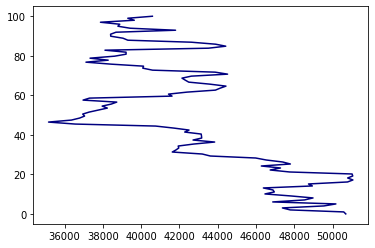

In [33]:
import matplotlib.pyplot as plt
y_=np.linspace(0,100,100)
plt.plot(X,y_, color='navy',label='RBF model')

In [25]:
y_.shape

(70,)

In [26]:
X_train.shape

(56, 1)